<a href="https://colab.research.google.com/github/TabithaWKariuki/Machine-Learning-Week-1/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_06_Tabitha_Kariuki_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Fifa Ranking Analysis

## 1. Defining the Question

### a) Specifying the Question


> A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).





### b) Defining the Metric for Success

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### c) Understanding the context 

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

### d) Recording the Experimental Design

In order to work on the above problem, you need to do the following:
1. Perform your EDA
2. Perform any necessary feature engineering 
3. Check of multicollinearity
4. Start building the model
5. Cross-validate the model
6. Compute RMSE
7. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8. Perform appropriate regressions on the data including your justification
9. Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

There are two datasets; ranking and results dataset [Dataset link](https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view). They have appropriate columns to answer the questions. They are both relevant for our analysis.

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the results

## 2. Reading the Data

In [5]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the fifa ranking Dataset and previewing

fifa=pd.read_csv('fifa_ranking.csv')

fifa.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [7]:
# Loading the results Dataset and previewing

results=pd.read_csv('results.csv')

results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

In [8]:
# Determining the no. of records in our datasets

fifa.shape

(57793, 16)

In [9]:
# Determining the no. of records in our datasets

results.shape

(40839, 9)

In [10]:
# Previewing the bottom of our dataset

fifa.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [11]:
# Previewing the bottom of our dataset

results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [12]:
# Checking whether each column has an appropriate datatype

fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [13]:
# Checking whether each column has an appropriate datatype

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [14]:
# checking the general information of our datasets

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [15]:
# checking the general information of our dataset
#

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [16]:
#changing date to datetime

results['date'] = pd.to_datetime(results['date'])

fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])

In [17]:
#splitting year and month on dates

results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

fifa['year'] = fifa.rank_date.dt.year
fifa['month'] = fifa.rank_date.dt.month

In [18]:
#merging the two datasets

NEWdata = pd.merge(fifa, results, how = 'left' , left_on =['year', 'month'],right_on = ['year', 'month'])
NEWdata.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,8,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,8,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False


In [19]:
# Determining the no. of records in our dataset

NEWdata.shape

(4293987, 27)

In [20]:
# Checking whether each column has an appropriate datatype

NEWdata.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
year                                int64
month                               int64
date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                          int64
away_score                          int64
tournament                        

In [21]:
# checking the general information of our datasets

NEWdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293987 entries, 0 to 4293986
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   rank                     int64         
 1   country_full             object        
 2   country_abrv             object        
 3   total_points             float64       
 4   previous_points          int64         
 5   rank_change              int64         
 6   cur_year_avg             float64       
 7   cur_year_avg_weighted    float64       
 8   last_year_avg            float64       
 9   last_year_avg_weighted   float64       
 10  two_year_ago_avg         float64       
 11  two_year_ago_weighted    float64       
 12  three_year_ago_avg       float64       
 13  three_year_ago_weighted  float64       
 14  confederation            object        
 15  rank_date                datetime64[ns]
 16  year                     int64         
 17  month                    in

## 4. External Data Source Validation

I made sure my data matches something outside of the dataset [link](https://www.fifa.com/fifa-world-ranking/men?dateId=id13603). It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.



## 5. Tidying the Dataset

In [22]:
# Identifying the Missing Data

NEWdata.isnull().sum()

# There are no null values in our data

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

In [23]:
# Checking for duplicates

NEWdata.duplicated().sum()

2879

In [24]:
#Dropping the duplicated records in the final dataset

NEWdata.drop_duplicates(keep='first', inplace = True)

In [25]:
# Confirming the dropped duplicate records

NEWdata.duplicated().sum()

0

In [26]:
# Rename column country_full to country in the dataset 

NEWdata.rename(columns = {'country_full': 'country'}, inplace=True)
NEWdata.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,8,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,8,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False


In [27]:
# Creating new dataset with relevant columns

data=NEWdata[['rank','country','home_team','away_team','home_score','away_score','tournament','city','month','year', 
              'total_points', 'previous_points']]
data.head(3)

,rank,country,country,home_team,away_team,home_score,away_score,tournament,city,month,year,total_points,previous_points
0,1,Germany,Colombia,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,8,1993,0.0,57
1,1,Germany,Peru,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,8,1993,0.0,57
2,1,Germany,Uruguay,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,8,1993,0.0,57


In [28]:
# Checking for Anomalies
#

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

rank                 51.0
home_score            0.0
away_score            0.0
month                 4.0
year               2001.0
total_points          0.0
previous_points      75.0
Name: 0.25, dtype: float64
rank                153.00
home_score            2.00
away_score            2.00
month                10.00
year               2013.00
total_points        131.77
previous_points     534.00
Name: 0.75, dtype: float64
rank               102.00
home_score           2.00
away_score           2.00
month                6.00
year                12.00
total_points       131.77
previous_points    459.00
dtype: float64
Lower_Boundrank               -102.000
home_score           -3.000
away_score           -3.000
month                -5.000
year               1983.000
total_points       -197.655
previous_points    -613.500
dtype: float64
Upper_Boundrank                306.000
home_score            5.000
away_score            5.000
month                19.000
year               2031.000
total

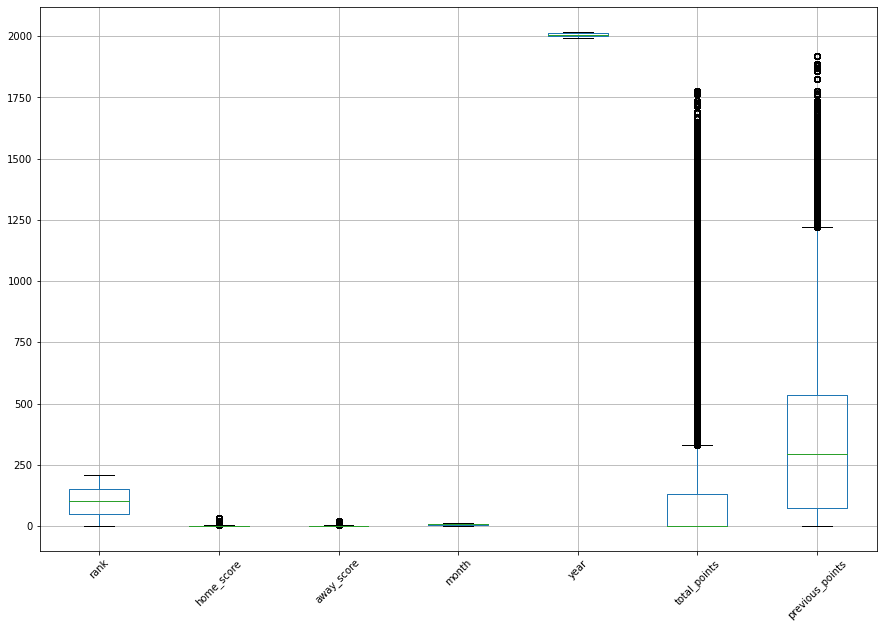

In [29]:
# Checking for Outliers in our dataset

data.boxplot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

# There is presence of outliers in our dataset 
# I will not be dropping them since they are few and they
# might be relevant to our analysis

In [30]:
# we use the to_csv function to create a csv file with the name example 
# and export it

data.to_csv('FIFAdata.csv')

In [31]:
# Loading and reading the data from our CSV
# Creating a new dataframe df1 and checking its shape

FIFAdata=pd.read_csv('FIFAdata.csv')

FIFAdata.head(2)

,Unnamed: 0,rank,country,country.1,home_team,away_team,home_score,away_score,tournament,city,month,year,total_points,previous_points
0,0,1,Germany,Colombia,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,8,1993,0.0,57
1,1,1,Germany,Peru,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,8,1993,0.0,57


## 6. Exploratory Analysis

Univariate Analysis

In [44]:
# Finding the summary statitics of our dataframe
# This line of code only selects the numerical variables only
# Measures of central tendency


FIFAdata.describe()

,Unnamed: 0,rank,home_score,away_score,month,year,total_points,previous_points
count,4.291108e+06,4.291108e+06,4.291108e+06,4.291108e+06,4.291108e+06,4.291108e+06,4.291108e+06,4.291108e+06
mean,2.146220e+06,1.021675e+02,1.653337e+00,1.102052e+00,6.855876e+00,2.006757e+03,1.323713e+02,3.464995e+02
std,1.239615e+06,5.887961e+01,1.711355e+00,1.353288e+00,3.254967e+00,6.755355e+00,2.687744e+02,3.034743e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.993000e+03,0.000000e+00,0.000000e+00
25%,1.072777e+06,5.100000e+01,0.000000e+00,0.000000e+00,4.000000e+00,2.001000e+03,0.000000e+00,7.500000e+01
50%,2.145554e+06,1.020000e+02,1.000000e+00,1.000000e+00,7.000000e+00,2.007000e+03,0.000000e+00,2.930000e+02
75%,3.219384e+06,1.530000e+02,2.000000e+00,2.000000e+00,1.000000e+01,2.013000e+03,1.317700e+02,5.340000e+02
max,4.293986e+06,2.090000e+02,3.100000e+01,2.100000e+01,1.200000e+01,2.018000e+03,1.775030e+03,1.920000e+03


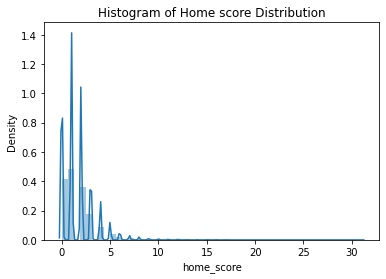

In [18]:
# Distribution graph showing ditribution of home score

sns.distplot(FIFAdata.home_score , kde=True)
plt.title('Histogram of Home score Distribution')
plt.show()

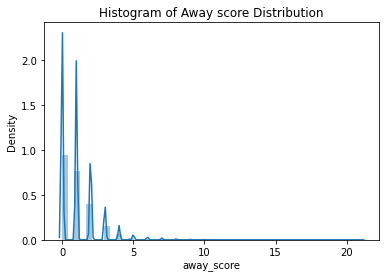

In [19]:
# Distribution graph showing ditribution of away score

sns.distplot(FIFAdata.away_score , kde=True)
plt.title('Histogram of Away score Distribution')
plt.show()

Bivariate

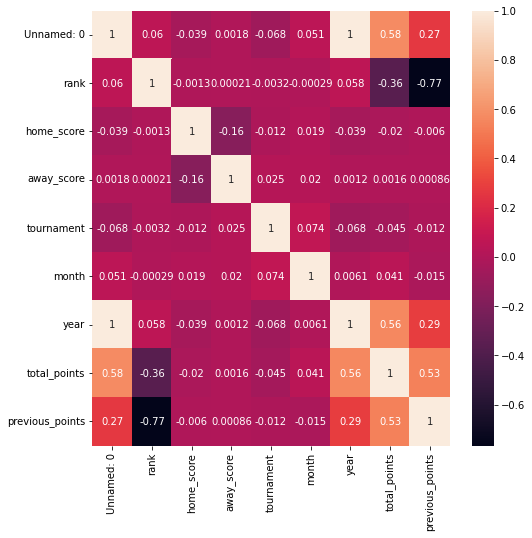

In [21]:
# heat map to show correlation 

plt.figure(figsize=(8, 8))

fr_corr = FIFAdata.corr()
sns.heatmap(fr_corr, 
            xticklabels = fr_corr.columns.values,
            yticklabels = fr_corr.columns.values,
            annot = True);

## 7. Implementing the Solution

In [41]:
# creating a function to represent status
# Feature Engineering: Figure out from 
# the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def status_hometeam(home_score,away_score):
  if home_score > away_score:
    return 'Win'
  elif home_score < away_score:
    return 'Lose'
  else:
    return 'Draw'

#creating status column

FIFAdata['status']=FIFAdata.apply(lambda x: status_hometeam(x['home_score'],x['away_score']), axis=1)

In [14]:
# Previewing to check status column

FIFAdata.head(2)

,Unnamed: 0,rank,country,home_team,away_team,home_score,away_score,tournament,city,month,year,total_points,previous_points,status
0,0,1,Colombia,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,8,1993,0.0,57,Draw
1,1,1,Peru,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,8,1993,0.0,57,Lose


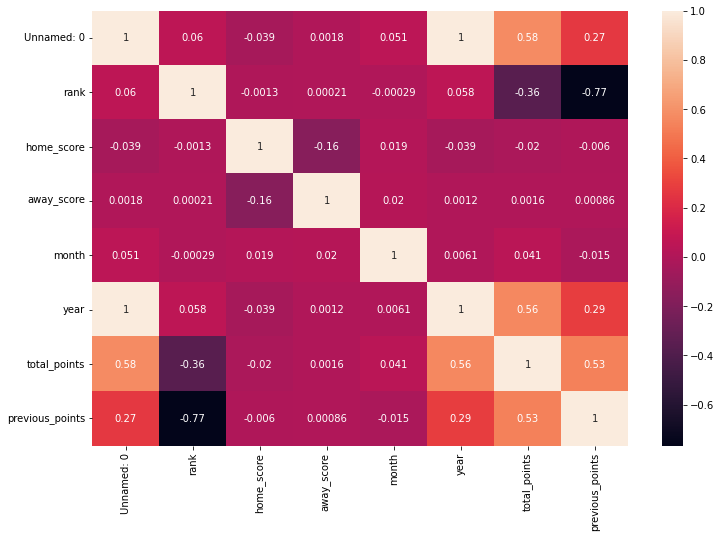

In [15]:
# Multi Collinearity
# Correlation

correlations = FIFAdata.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

Polynomial Regression

In [34]:
# Encode labels in column 'tournament'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['tournament'] = le.fit_transform(FIFAdata['tournament'])

Model 1: Predict how many goals the home team scores.

In [35]:
#creating and training our polynomial model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = FIFAdata[['rank','tournament']]
y = FIFAdata['home_score']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 6)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.241013604701367
Mean Squared Error: 2.938820785185255
Root Mean Squared Error: 1.7142989194376967


The Rmse score of 1.72 is bigger than 10% of mean,hence its not a very good model however it can still be used for prediction it is not too far apart from the MSE.

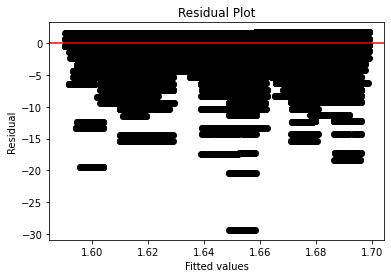

In [37]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

Model 2: Predict how many goals the away team scores.

In [16]:
#creating and training our polynomial model
#for the second model we use away scores

X = FIFAdata[['rank','tournament']]
y = FIFAdata['away_score']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9369089014349166
Mean Squared Error: 1.8362301943199708
Root Mean Squared Error: 1.3550757153458144


The Rmse score of 1.36 is bigger than 10% of mean,hence its not a very good model however it can still be used for prediction it is not too far apart from the MSE.

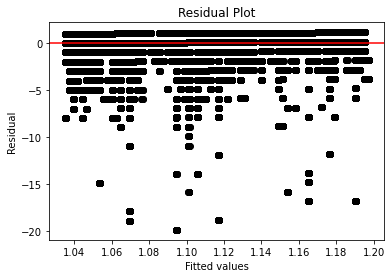

In [17]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

Heteroskedacity

In [38]:
#finding the p value
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#finding the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

#if test_result > critical_value we reject the null hypothesis
#
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Cross Validation

Let's now cross validate our model by using k-fold cross validation. We will use 5 folds.

In [23]:
# Encode labels in column 'home_team'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['home_team'] = le.fit_transform(FIFAdata['home_team'])

In [24]:
# Encode labels in column 'away_team'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['away_team'] = le.fit_transform(FIFAdata['away_team'])

In [26]:
# Encode labels in column 'tournament'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['tournament'] = le.fit_transform(FIFAdata['tournament'])

In [28]:
# Encode labels in column 'tournament'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['status'] = le.fit_transform(FIFAdata['status'])

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will use 5 independent variables for this
X = FIFAdata[[ 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament',]].values
y = FIFAdata['status'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.6943662991547237

Training model 2
Model 2 Root Mean Squared Error: 0.7109611037469772

Training model 3
Model 3 Root Mean Squared Error: 0.6784813715947251

Training model 4
Model 4 Root Mean Squared Error: 0.6839234639558455

Training model 5
Model 5 Root Mean Squared Error: 0.681718599631311


As you can tell from running the code, the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used. Perhaps most of the dataset's outliers were in the test set of model 1? as a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [31]:
np.mean(RMSES)

0.6898901676167164

The average is fairly close to our initial value.

Logistic Approach

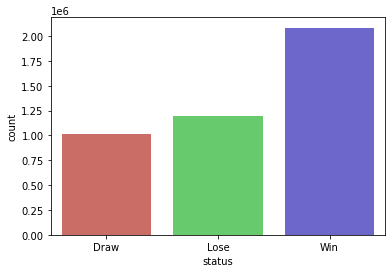

In [52]:
# Checking that our target variable is binary
# To make sure that it's a binary variable, 
# let's use Seaborn's countplot() function.

sb.countplot(x='status',data=FIFAdata, palette='hls')

In [16]:
FIFAdata.columns

Index(['Unnamed: 0', 'rank', 'country', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'month', 'year', 'total_points',
       'previous_points', 'status'],
      dtype='object')

In [42]:
#select relevant columns for this model

data = FIFAdata[['home_team', 'away_team', 'home_score', 'away_score', 
                 'tournament', 'status']]

data.head()

,home_team,away_team,home_score,away_score,tournament,status
0,Colombia,Paraguay,0,0,29,Draw
1,Peru,Argentina,0,1,29,Lose
2,Uruguay,Ecuador,0,0,29,Draw
3,Venezuela,Brazil,1,5,29,Lose
4,Senegal,Zambia,0,0,29,Draw


In [ ]:
# Split the data into features and the target variable
#

from sklearn.linear_model import LogisticRegression

X = data.drop('status', axis = 1)
y = data.status

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)

In [ ]:
# Measuring the accuracy of the model

from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn import metrics

print('The accuracy of the model is', accuracy_score(y_test, y_pred)*100,'%')

In [ ]:
#Checking precision:

print(classification_report(y_test,y_pred))

In [ ]:
# Hyperparameter tuning for logistic regression using gridsearch method

# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 5, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

#grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

#fitting
best_model = clf.fit(X, y)

#checking on the hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

## 8. Challenging the solution

> Other algorithms could be implemented to see if there will be an improvement in performance of the models to improve accuracy.






## 9. Follow up questions

### a). Did we have the right data?

The data was relevant for analysis and modelling . 

### b). Do we need other data to answer our question?

Yes, for comparision and verification purposes. Additional data could maybe improve output

### c). Did we have the right question?

The questions were all relevant for our analysis